In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df= pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/Loan-Application-Status-Prediction/main/loan_prediction.csv')

In [3]:

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print('Dataset have ',df.shape[0],' Rows and ',df.shape[1],' Columns')

Dataset have  614  Rows and  13  Columns


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
round((df.isnull().sum()/df.shape[0])*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

<Axes: >

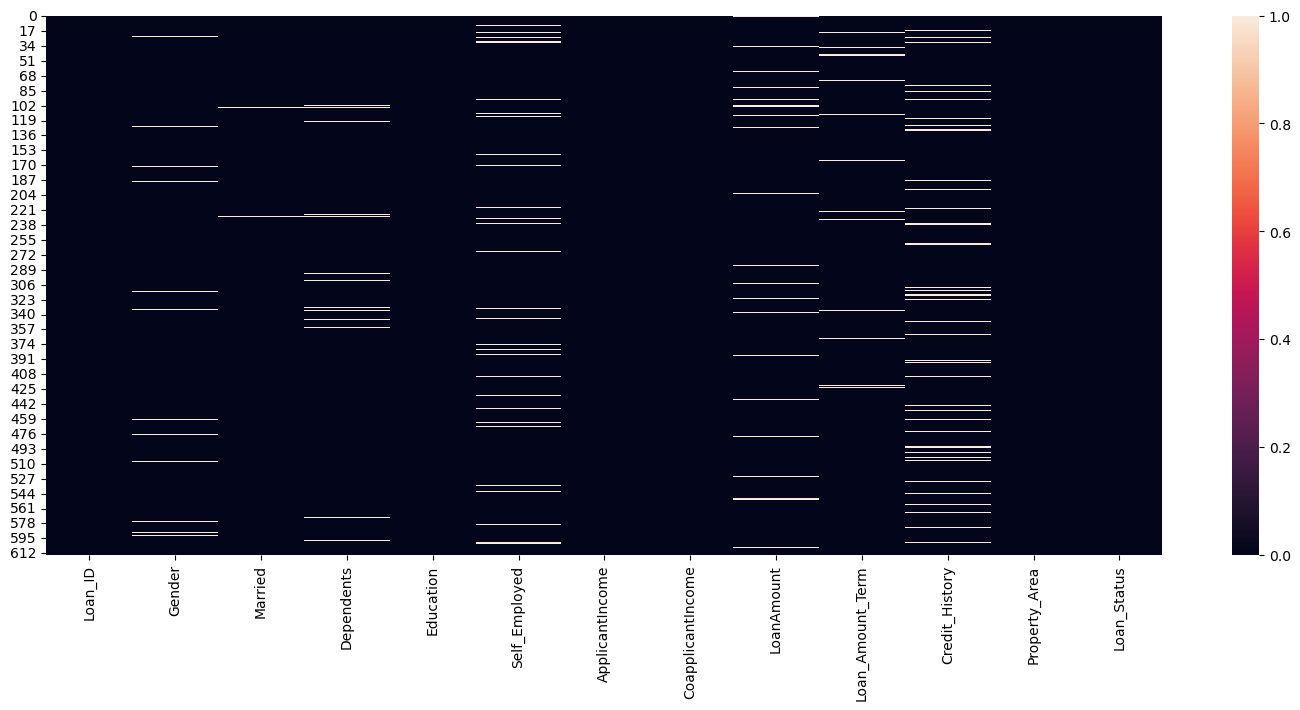

In [10]:
plt.figure(figsize=(18,7))
sns.heatmap(df.isnull())

In [11]:
for i in df.columns[1:]:
    print( i ,'have unique values = ',df[i].unique(),'\n')

Gender have unique values =  ['Male' 'Female' nan] 

Married have unique values =  ['No' 'Yes' nan] 

Dependents have unique values =  ['0' '1' '2' '3+' nan] 

Education have unique values =  ['Graduate' 'Not Graduate'] 

Self_Employed have unique values =  ['No' 'Yes' nan] 

ApplicantIncome have unique values =  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  38

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

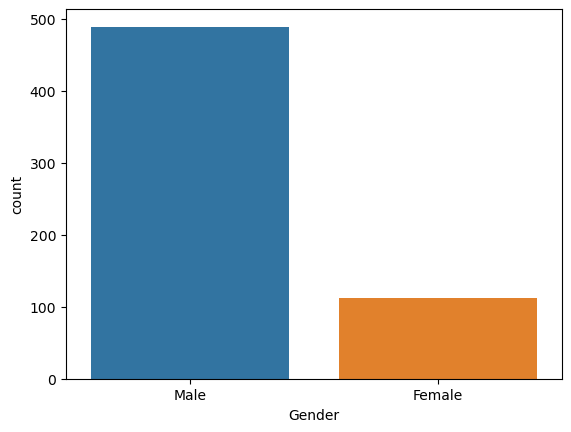

In [33]:
sns.countplot(x='Gender',data=df)

In [16]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
df['Gender'].value_counts(normalize=True, dropna=False)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

In [18]:
# approx 80% are male applicant
# approx 18% are female applicant
# 2% are null values
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

<Axes: xlabel='Married', ylabel='count'>

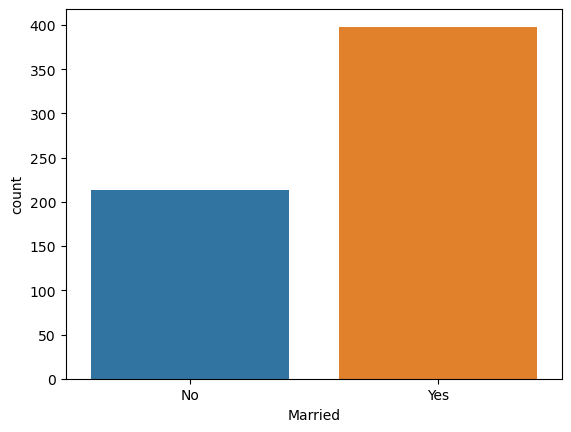

In [34]:
sns.countplot(x='Married',data=df)

In [20]:
df['Married'].value_counts(normalize=True, dropna=False)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

In [22]:
# who asked for Loan?
# Mostly Married Male   and  Non-married Females
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

<Axes: xlabel='Dependents', ylabel='count'>

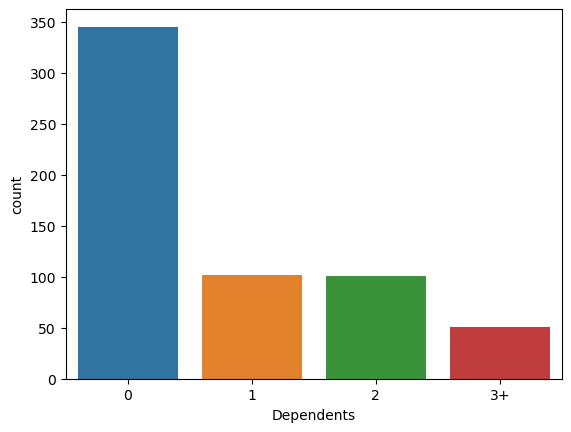

In [44]:
sns.countplot(x='Dependents',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

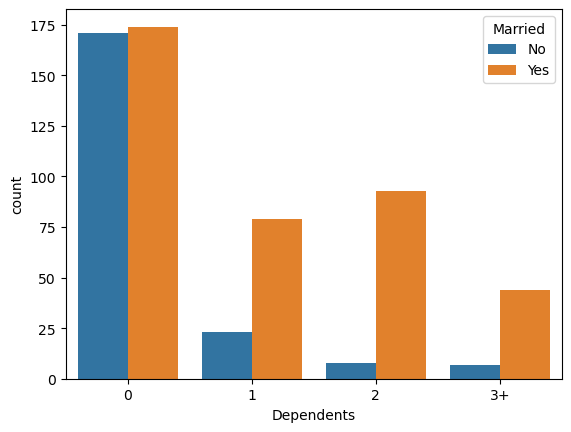

In [35]:
# Majority applicant have 0 dependents

sns.countplot(x='Dependents', hue='Married', data=df)

In [26]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [27]:
df['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

<Axes: xlabel='Education', ylabel='count'>

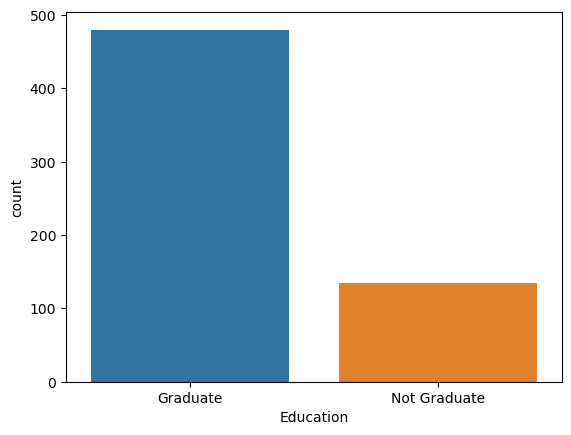

In [37]:
# 78% applicants are Graduated
# 21.8% are not graduated
sns.countplot(x='Education',data=df)

In [29]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
df['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

<Axes: xlabel='Self_Employed', ylabel='count'>

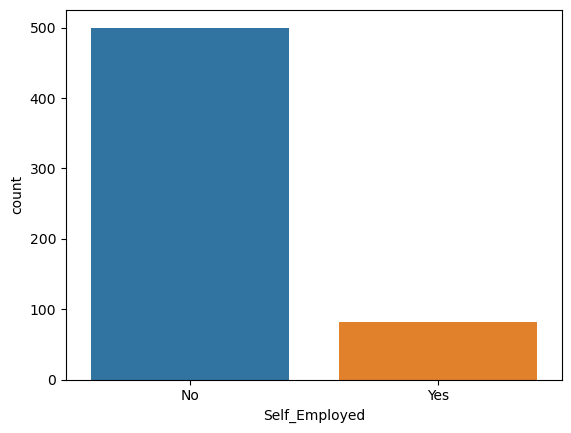

In [38]:
sns.countplot(x='Self_Employed',data=df)

In [32]:
df['ApplicantIncome'].nunique()


505

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

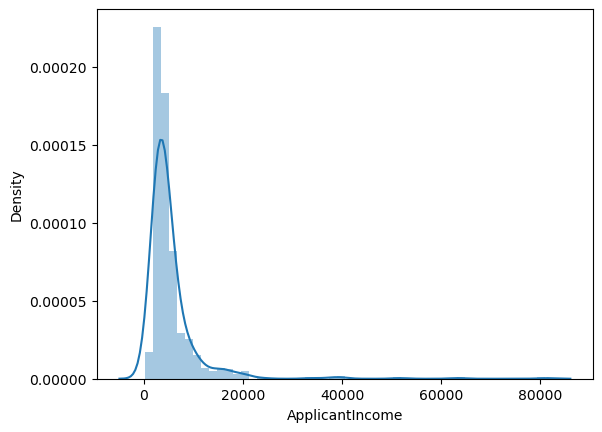

In [42]:
sns.distplot(df['ApplicantIncome'])

In [45]:
df['ApplicantIncome'].describe().T

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

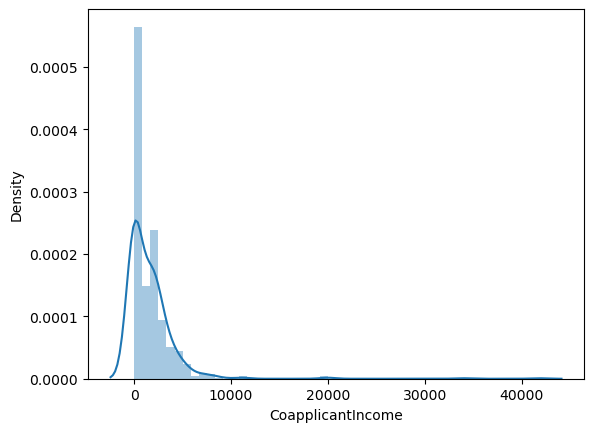

In [47]:
#CoapplicantIncome
sns.distplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

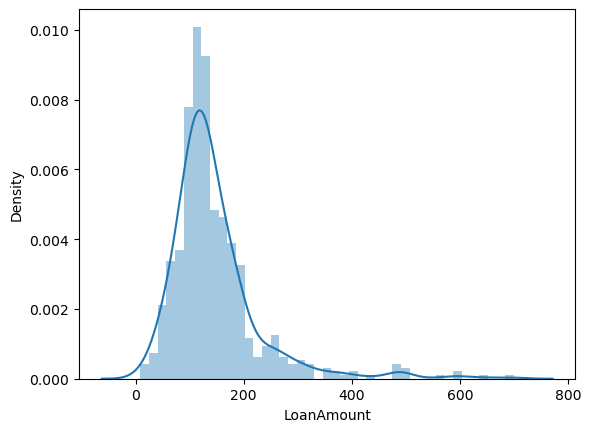

In [48]:
#LoanAmount
sns.distplot(df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

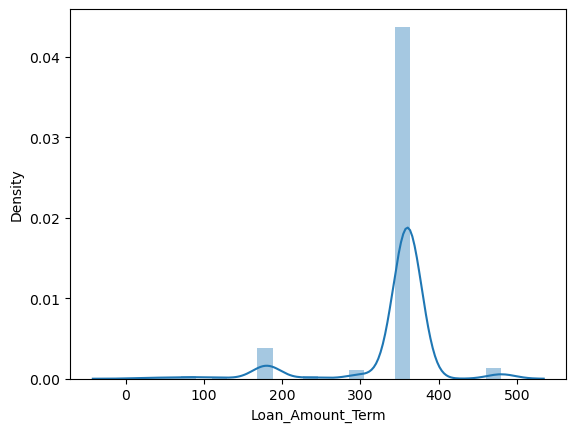

In [49]:
#Loan_Amount_Term
sns.distplot(df['Loan_Amount_Term'])

<Axes: ylabel='count'>

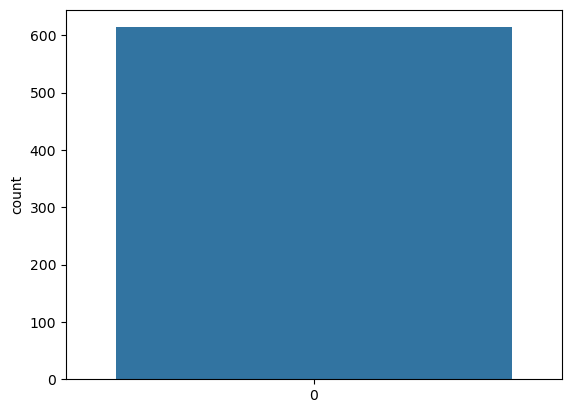

In [50]:
sns.countplot(df['Loan_Amount_Term'])

In [51]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [52]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

<Axes: ylabel='count'>

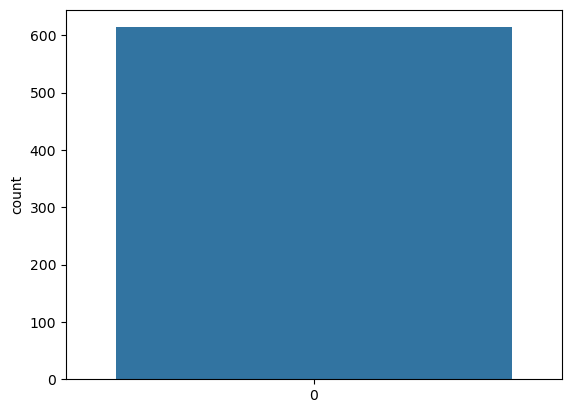

In [53]:
#Credit_History
sns.countplot(df['Credit_History'])

In [54]:
df['Credit_History'].value_counts(normalize=True,dropna=False)

1.0    0.773616
0.0    0.144951
NaN    0.081433
Name: Credit_History, dtype: float64

In [55]:
# Property_Area
df['Property_Area'].value_counts(normalize=True,dropna=False)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [56]:
#Loan_Status
df['Loan_Status'].value_counts(normalize=True,dropna=False)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [58]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


<Axes: xlabel='Gender', ylabel='count'>

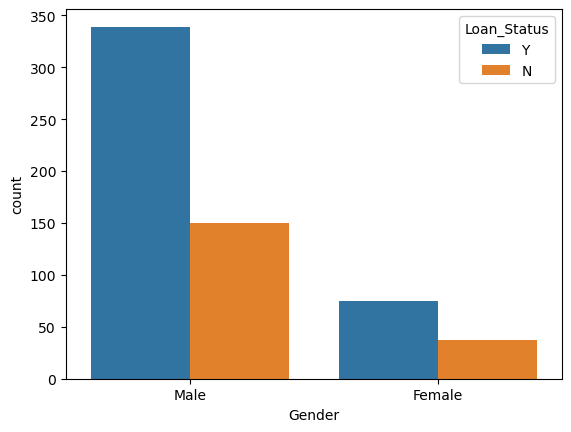

In [60]:
# Loan_ID is not required. This donot provide any information to predict whether the Loan will be granted or Not, We can drop this
sns.countplot(x='Gender',hue=df['Loan_Status'], data=df)

In [61]:
df.groupby('Gender')['Loan_Status'].value_counts(normalize=True,dropna=False)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

<Axes: xlabel='Married', ylabel='count'>

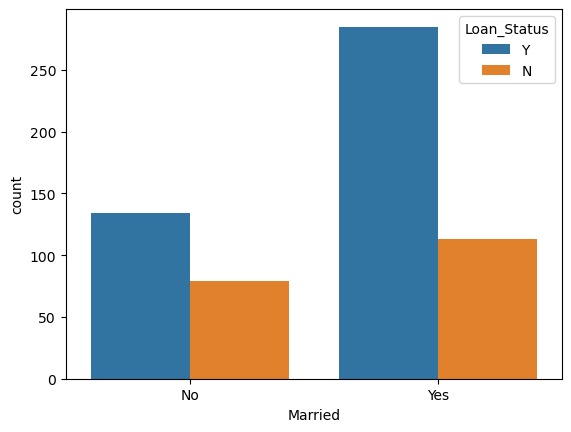

In [65]:
#Married vs Loan
sns.countplot(x='Married',hue=df['Loan_Status'],data=df)

In [66]:
df['Married'].value_counts(normalize=True,dropna=False)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

In [67]:
df.groupby('Married')['Loan_Status'].value_counts(normalize=True,dropna=False)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: Loan_Status, dtype: float64

<Axes: xlabel='Dependents', ylabel='count'>

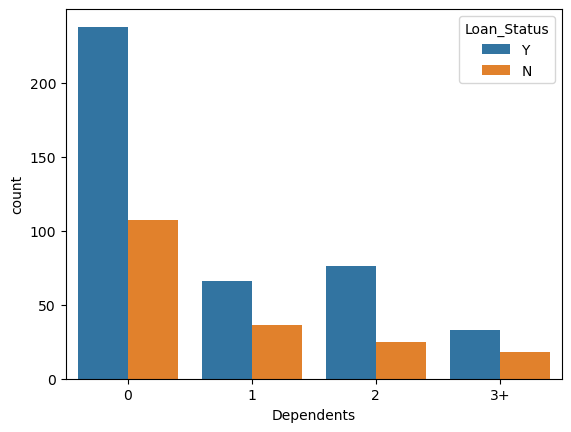

In [70]:
#Dependents vs Loan
sns.countplot(x='Dependents',hue='Loan_Status', data=df)

<Axes: xlabel='Education', ylabel='count'>

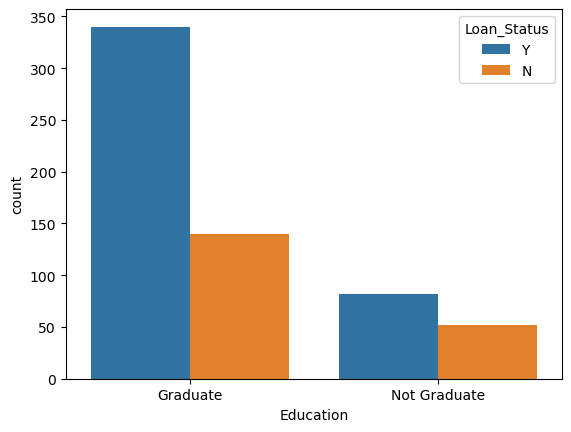

In [71]:
#Education vs Loan
sns.countplot(x='Education',hue='Loan_Status', data=df)

In [72]:
df['Education'].value_counts(normalize=True,dropna=False)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [74]:
df.groupby('Education')['Loan_Status'].value_counts(normalize=True,dropna=False)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64

<Axes: xlabel='Self_Employed', ylabel='count'>

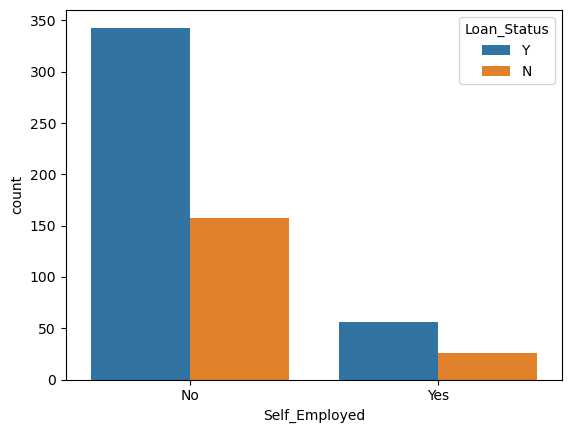

In [77]:
#Self_Employed vs Loan
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [78]:
df['Self_Employed'].value_counts(normalize=True,dropna=False)

No     0.814332
Yes    0.133550
NaN    0.052117
Name: Self_Employed, dtype: float64

In [79]:
df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True,dropna=False)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

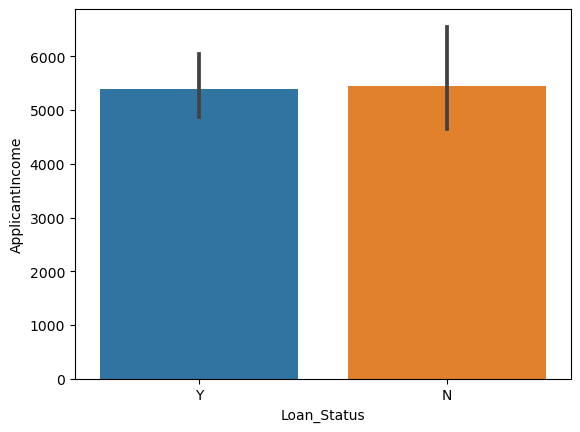

In [80]:
sns.barplot(x='Loan_Status',y='ApplicantIncome', data=df)

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

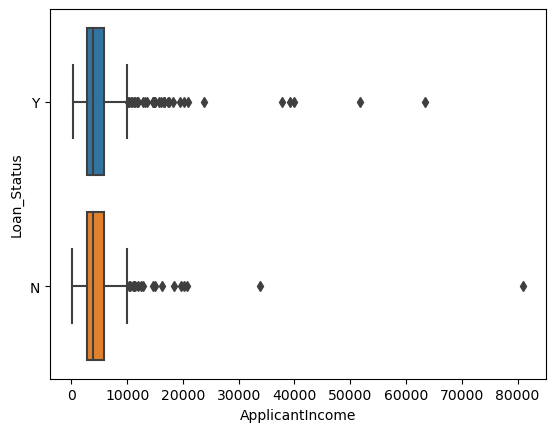

In [81]:
sns.boxplot(x=df['ApplicantIncome'],y=df['Loan_Status'],orient='h')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

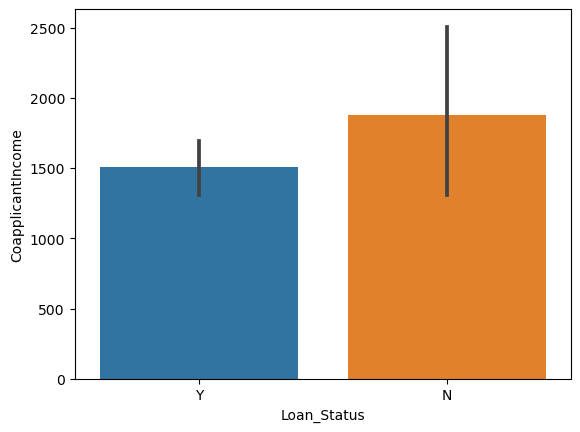

In [82]:
#CoapplicantIncome vs Loan
sns.barplot(x='Loan_Status',y='CoapplicantIncome', data=df)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

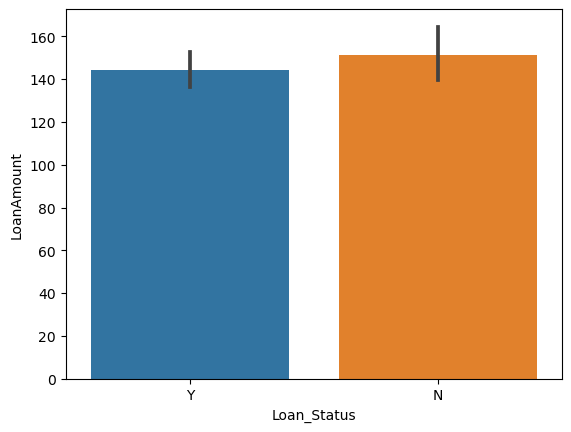

In [83]:
#LoanAmount vs Loan
sns.barplot(y=df['LoanAmount'],x=df['Loan_Status'])

In [85]:
# Majority loan was asked for 30yr, Mostly was approved.

# If loas was asked for 40 years, chances are high for rejection

<Axes: xlabel='Credit_History', ylabel='count'>

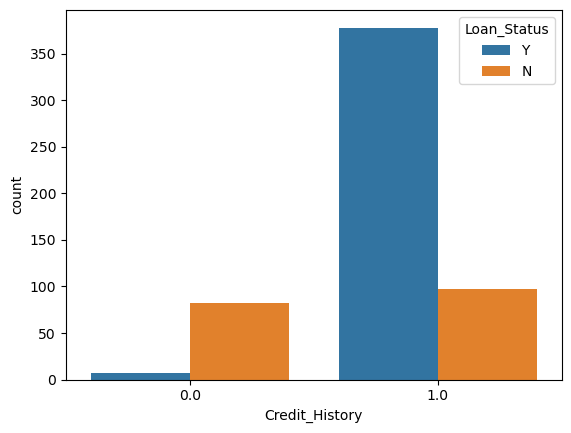

In [89]:
#Credit_History vs Loan
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)


In [90]:
# If Credit history is available, Chances your loan will approve.
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True,dropna=False)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

In [91]:
# If Credit History is availabe, 80% chances for approved loan

# If credit History is not available, 92% chances for loan rejection

<Axes: xlabel='Property_Area', ylabel='count'>

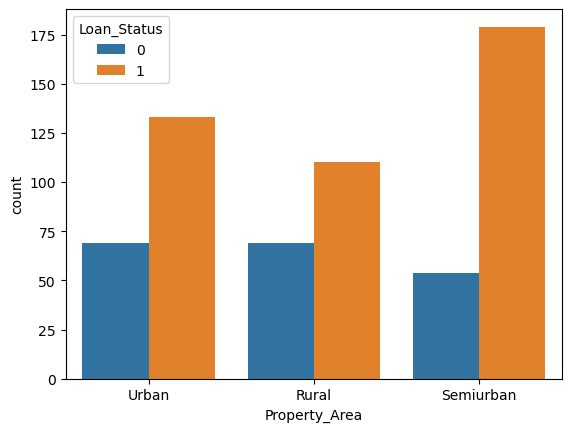

In [122]:
#Property_Area vs Loan
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [93]:
#Convert Target Variable into Interegt
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


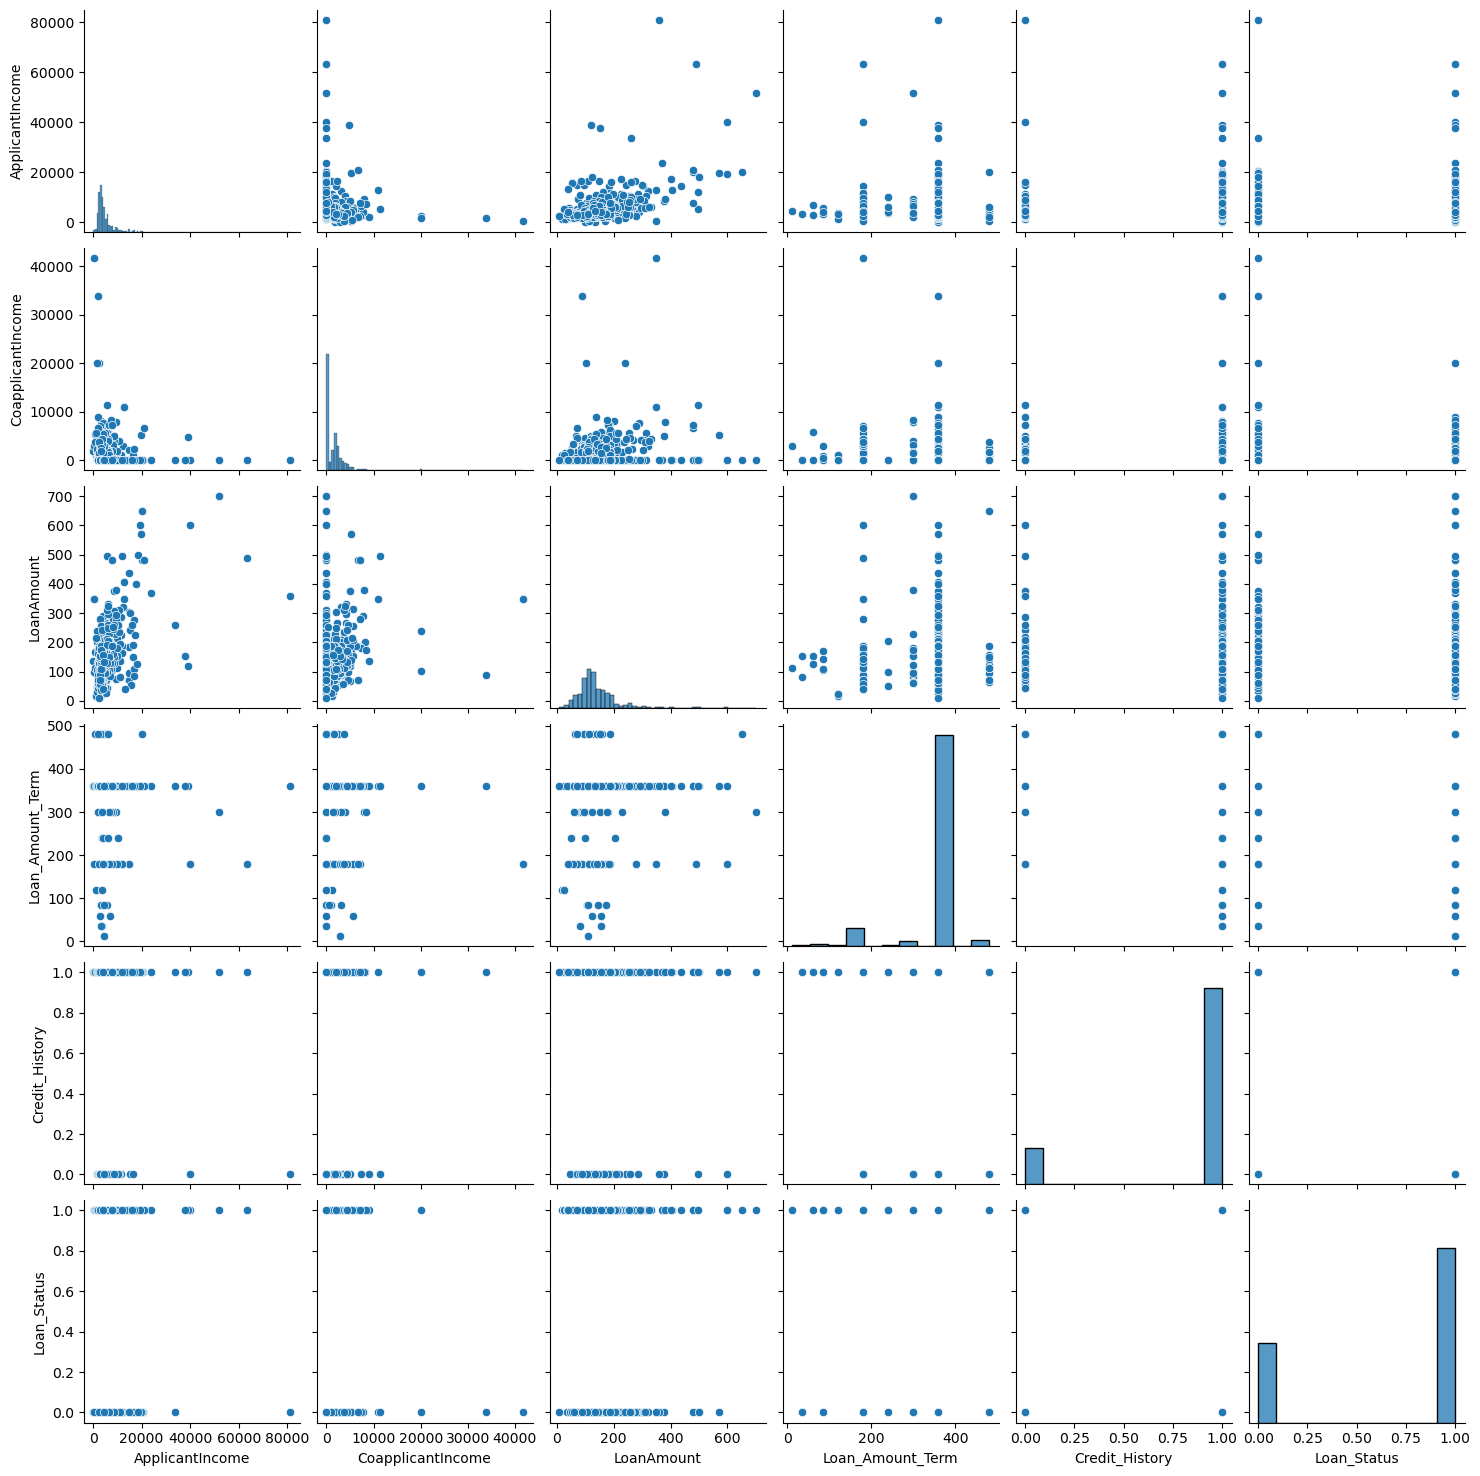

In [95]:
#Multivarient EDA
sns.pairplot(df)

In [96]:
# LoanAmount have positive correlation with ApplicantIncome
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

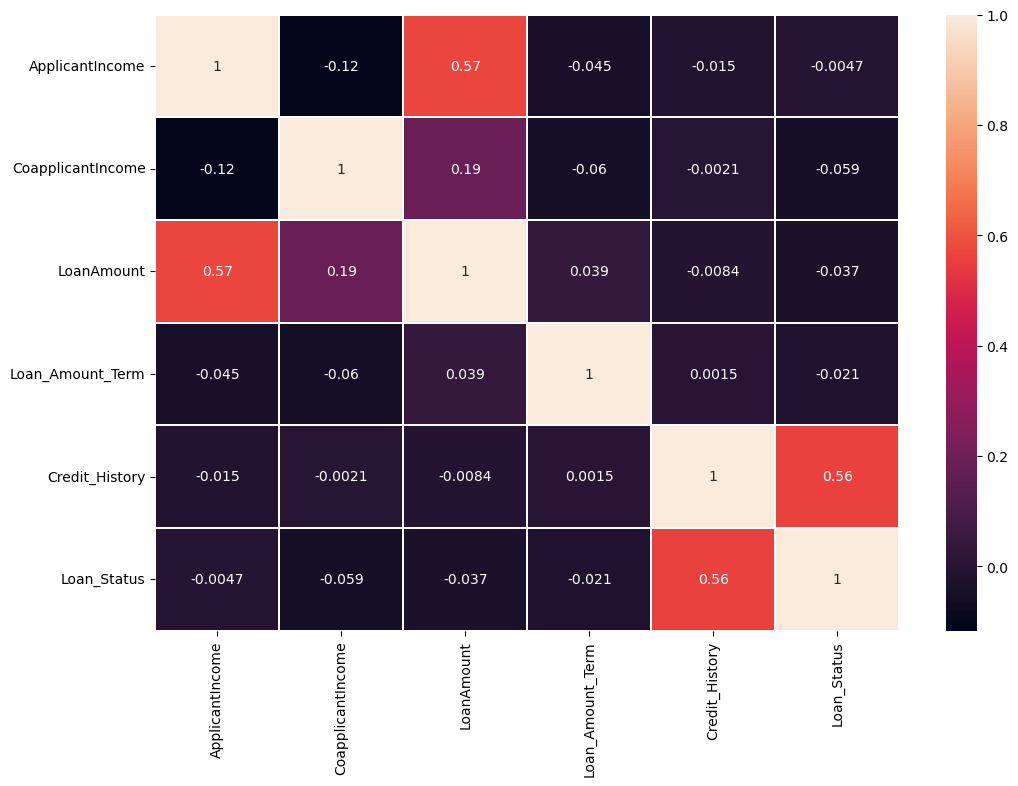

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

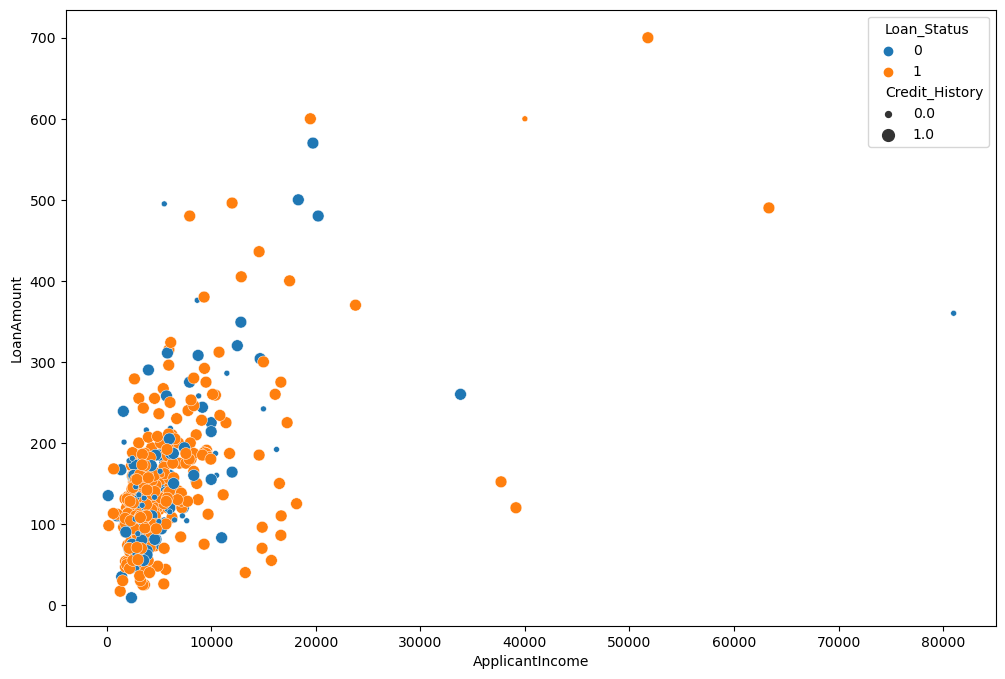

In [98]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

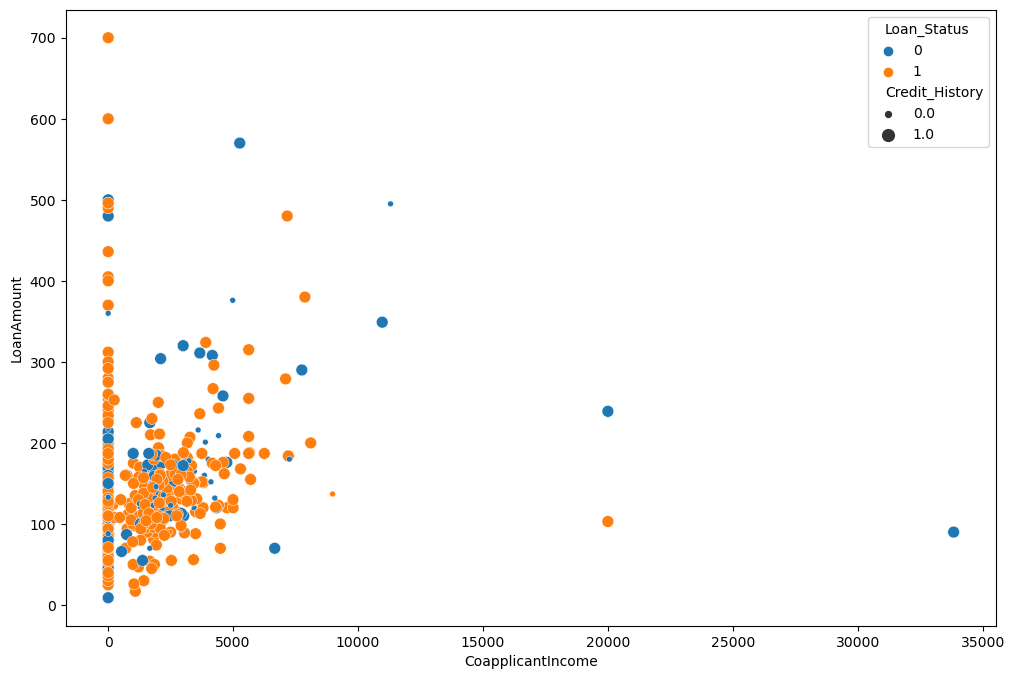

In [99]:
# SOme outliers are present in Applicant income
plt.figure(figsize=(12,8))
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

In [100]:
# Even coapplicant income is 0, Loan has been granted
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [101]:
#Missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [102]:
num =df.select_dtypes(np.number)
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1
610,4106,0.0,40.0,180.0,1.0,1
611,8072,240.0,253.0,360.0,1.0,1
612,7583,0.0,187.0,360.0,1.0,1


In [103]:
cat=df.select_dtypes('O')
cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [104]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [105]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [106]:
df['LoanAmount'].median()

128.0

In [107]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [108]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [109]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [110]:
cat.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [111]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [112]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
df['Loan_Amount_Term'].dtypes

dtype('float64')

In [114]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [115]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [116]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [117]:
df.drop('Loan_ID', axis=1, inplace=True)

In [118]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [119]:
df['Dependents'].replace('3+',3, inplace=True)
df['Dependents']=df['Dependents'].astype(int)

In [123]:
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

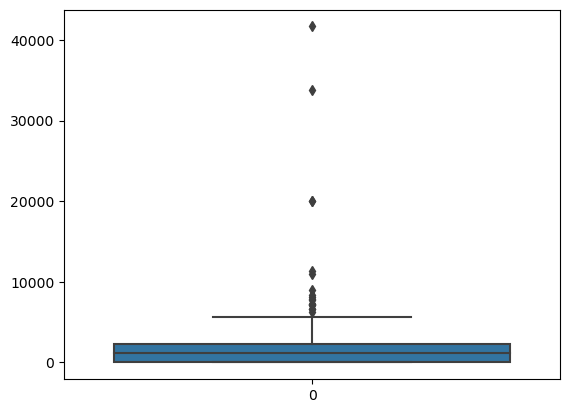

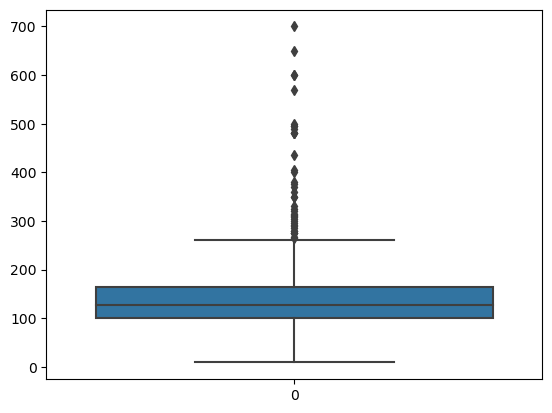

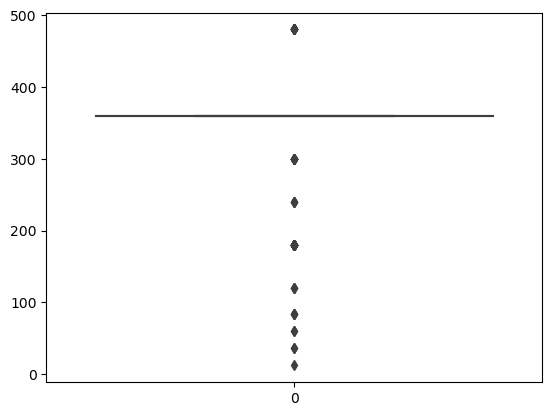

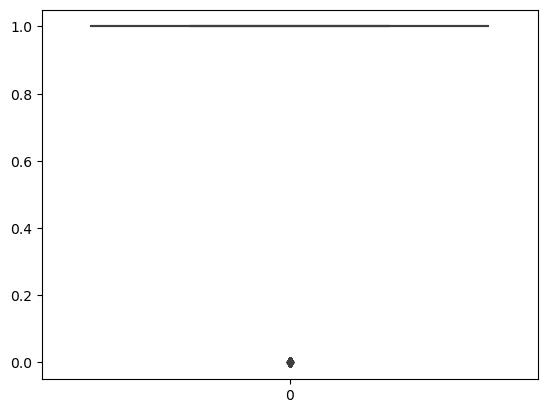

In [124]:
for i in df.columns:
    if df[i].dtypes==np.number:
        sns.boxplot(df[i])
        plt.show()

<Axes: xlabel='TotalIncome', ylabel='Density'>

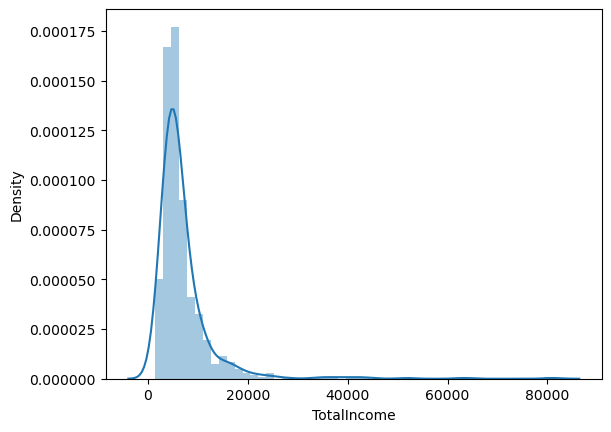

In [125]:
df['TotalIncome']=df['ApplicantIncome']+ df['CoapplicantIncome']
sns.distplot(df['TotalIncome'])

In [126]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [127]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0


In [128]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status           int32
TotalIncome         float64
dtype: object

<Axes: >

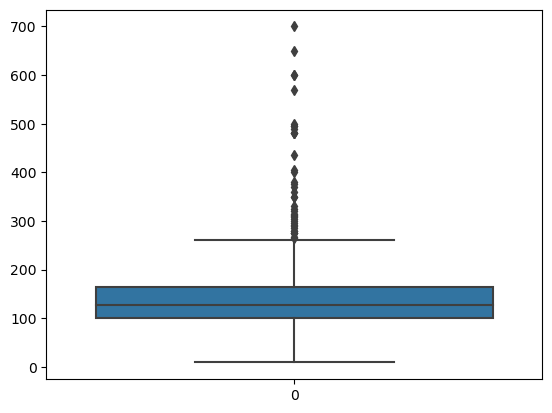

In [129]:
sns.boxplot(df['LoanAmount'])

<Axes: >

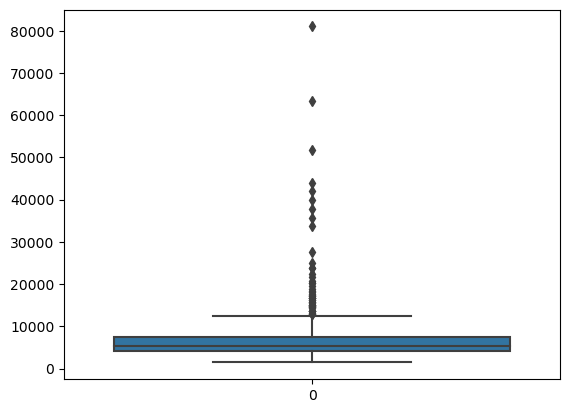

In [130]:
sns.boxplot(df['TotalIncome'])

In [131]:
IQR= df['LoanAmount'].quantile(.75)- df['LoanAmount'].quantile(.25)
IQR


64.5

In [132]:
upper= df['LoanAmount'].quantile(.75) +(1.5 * IQR)
upper

261.5

In [133]:
df['LoanAmount']= np.where(df['LoanAmount']>upper,upper,df['LoanAmount'])

<Axes: >

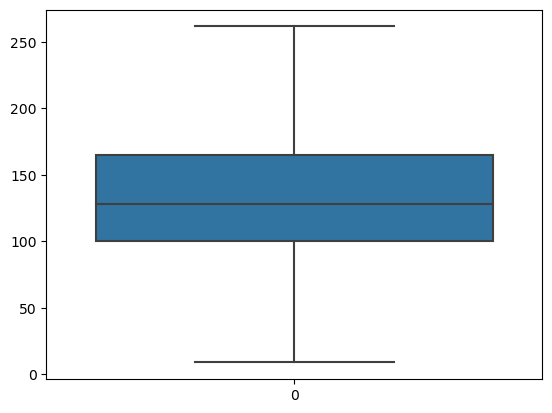

In [134]:
sns.boxplot(df['LoanAmount'])

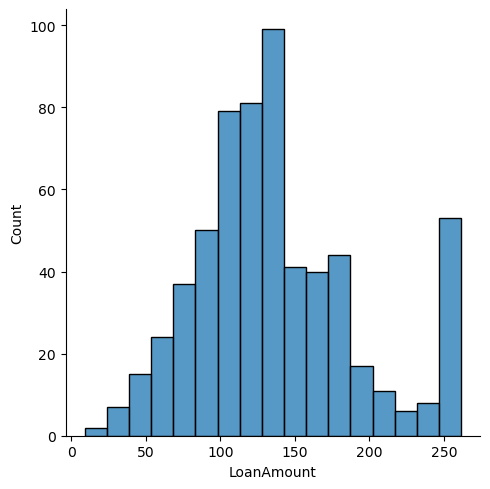

In [135]:
sns.displot(df['LoanAmount'])

In [136]:
IQR= df['TotalIncome'].quantile(.75)- df['TotalIncome'].quantile(.25)
IQR

3355.75

In [137]:
upper= df['TotalIncome'].quantile(.75) +(1.5 * IQR)
upper

12555.375

In [138]:
df['TotalIncome']= np.where(df['TotalIncome']>upper,upper,df['TotalIncome'])

<Axes: >

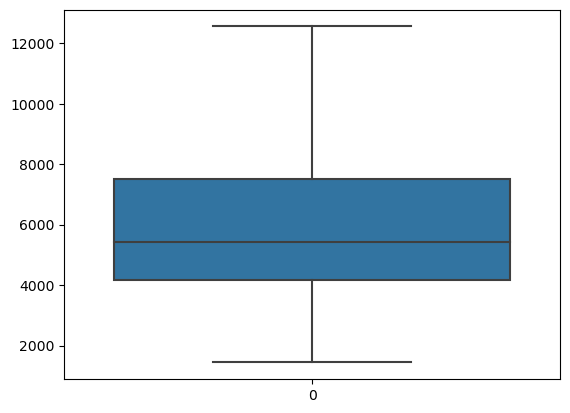

In [139]:
sns.boxplot(df['TotalIncome'])

In [140]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0


In [142]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status           int32
TotalIncome         float64
dtype: object

In [143]:
X= df.drop('Loan_Status', axis=1)
Y=df['Loan_Status']
X.shape , Y.shape

((614, 10), (614,))

In [144]:
X=pd.get_dummies(X, drop_first=True)
X.shape


(614, 11)

In [145]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [146]:
#Dataset Balancing
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [147]:
X,Y=sm.fit_resample(X,Y)
X.shape , Y.shape

((844, 11), (844,))

In [150]:
#Transformation
X.skew()

Dependents                 1.219065
LoanAmount                 0.666355
Loan_Amount_Term          -2.426186
Credit_History            -1.398268
TotalIncome                0.872050
Gender_Male               -1.254880
Married_Yes               -0.341967
Education_Not Graduate     1.765550
Self_Employed_Yes          2.573823
Property_Area_Semiurban    0.919385
Property_Area_Urban        1.057627
dtype: float64

In [151]:
from sklearn.preprocessing import power_transform
transformed=power_transform(X)

In [152]:
#SCaled
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(transformed)
X=scaled

In [153]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [154]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

Best accuracy is  0.8816568047337278 on Random State = 45


In [155]:
# Select Random State 122
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=122,test_size=.20)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [157]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 83.4319526627219
Confusion Matrix of  LogisticRegression()  is 
 [[63 21]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        84
           1       0.79      0.92      0.85        85

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169

**************************************************
Accuracy_Score of  RidgeClassifier() is 82.84023668639054
Confusion Matrix of  RidgeClassifier()  is 
 [[61 23]
 [ 6 79]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        84
           1       0.77      0.93      0.84        85

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169

**********************************************

In [158]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [159]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)


Accuracy_Score of  LogisticRegression() is 83.4319526627219
cross Validation accuracy score of  LogisticRegression()  is  79.39278670047901
**************************************************
Accuracy_Score of  RidgeClassifier() is 82.84023668639054
cross Validation accuracy score of  RidgeClassifier()  is  79.74781628627781
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 74.55621301775149
cross Validation accuracy score of  DecisionTreeClassifier()  is  74.17371090448015
**************************************************
Accuracy_Score of  SVC() is 84.02366863905326
cross Validation accuracy score of  SVC()  is  79.51042547196394
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 82.84023668639054
cross Validation accuracy score of  KNeighborsClassifier()  is  76.31304592843054
**************************************************
Accuracy_Score of  RandomForestClassifier() is 84.02366863905326


In [160]:
# Lets try to hypertune this algo.
from sklearn.model_selection import GridSearchCV

In [161]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

In [167]:
GCV= GridSearchCV(GB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [5, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [168]:
GCV.best_estimator_

GradientBoostingClassifier()

In [169]:
GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [170]:
pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)

0.8520710059171598

In [172]:
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))
print('F1 score:', round(f1_score(y_test,pred) * 100, 2))

Accuracy score: 85.21
F1 score: 86.63


In [175]:
#Saving the Model
import joblib
joblib.dump(GCV.best_estimator_,"Loan_Application.pkl")
['Loan_Application.pkl']

['Loan_Application.pkl']